## 1. Einleitung / Ziel des Projekts 📺

Dieses Projekt untersucht **YouTube-Trending-Videos** und sucht nach Mustern,  
die beeinflussen, **welche Videos viral gehen**.

**Fragestellungen:**
- **Welche Kategorien tauchen besonders oft auf?**
- **Gibt es Zusammenhänge zwischen Views, Likes und Kommentaren?**
- **Wie lange bleibt ein Video im Trend?**


## 2. Daten laden & Überblick 🧐

Wir laden die Daten (`DE_youtube_trending_data.csv`)  
und verschaffen uns einen ersten Überblick:
- **Wie viele Zeilen und Spalten gibt es?**
- **Welche Spalten sind enthalten?**
- **Gibt es fehlende Werte?**


In [3]:
import pandas as pd

# Daten laden
df = pd.read_csv("../data/DEvideos.csv")

# Ersten Blick auf die Daten werfen
df.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,False,False,False,►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...
4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,18 Song Mashup über den (veränderten) Beat von...


## 3. Erste Datenprüfung 🧪

Ziel:
- **Größe des Datensatzes ermitteln**
- **Spaltennamen und Datentypen prüfen**
- **Fehlende Werte identifizieren**


In [4]:
# Größe des Datensatzes
df.shape

# Datentypen und Speicherverbrauch prüfen
df.info()

# Fehlende Werte prüfen
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40840 entries, 0 to 40839
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40840 non-null  object
 1   trending_date           40840 non-null  object
 2   title                   40840 non-null  object
 3   channel_title           40840 non-null  object
 4   category_id             40840 non-null  int64 
 5   publish_time            40840 non-null  object
 6   tags                    40840 non-null  object
 7   views                   40840 non-null  int64 
 8   likes                   40840 non-null  int64 
 9   dislikes                40840 non-null  int64 
 10  comment_count           40840 non-null  int64 
 11  thumbnail_link          40840 non-null  object
 12  comments_disabled       40840 non-null  bool  
 13  ratings_disabled        40840 non-null  bool  
 14  video_error_or_removed  40840 non-null  bool  
 15  de

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1552
dtype: int64

## 4. Erste Verteilungen der Erfolgskennzahlen 📊

Ziel:
- **Wie verteilen sich Views, Likes und Kommentare?**
- **Sind die Werte extrem unterschiedlich (z. B. einige Videos mit Millionen, andere mit wenigen)?**


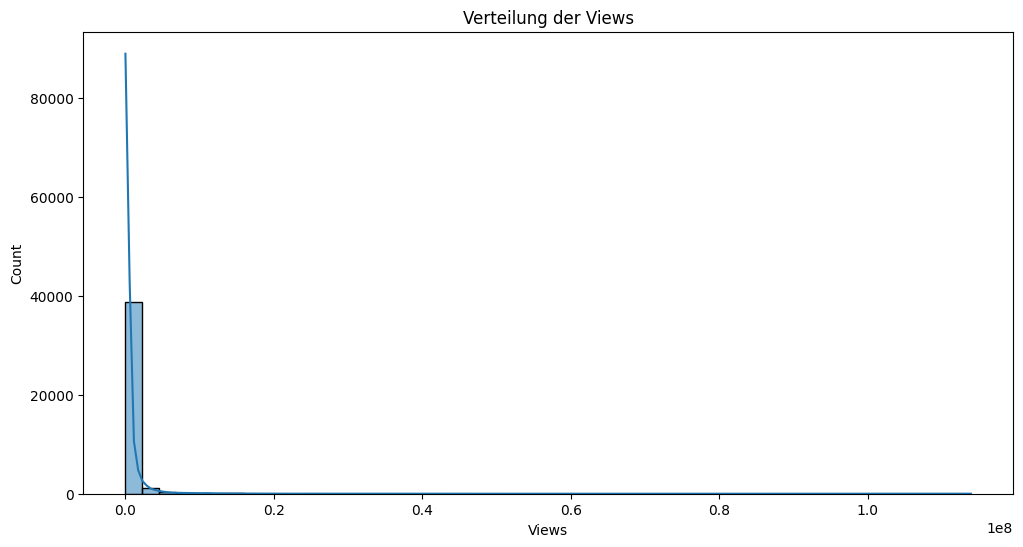

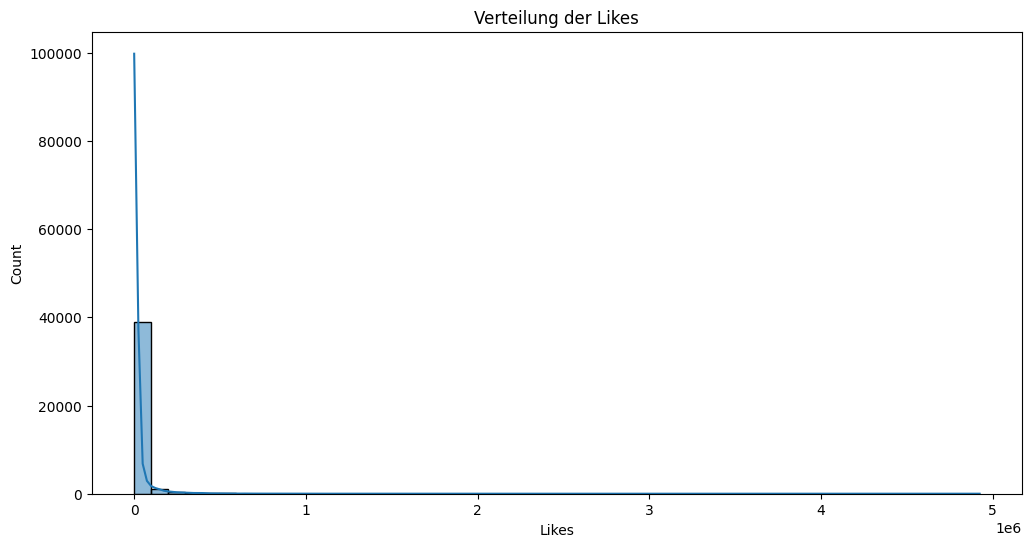

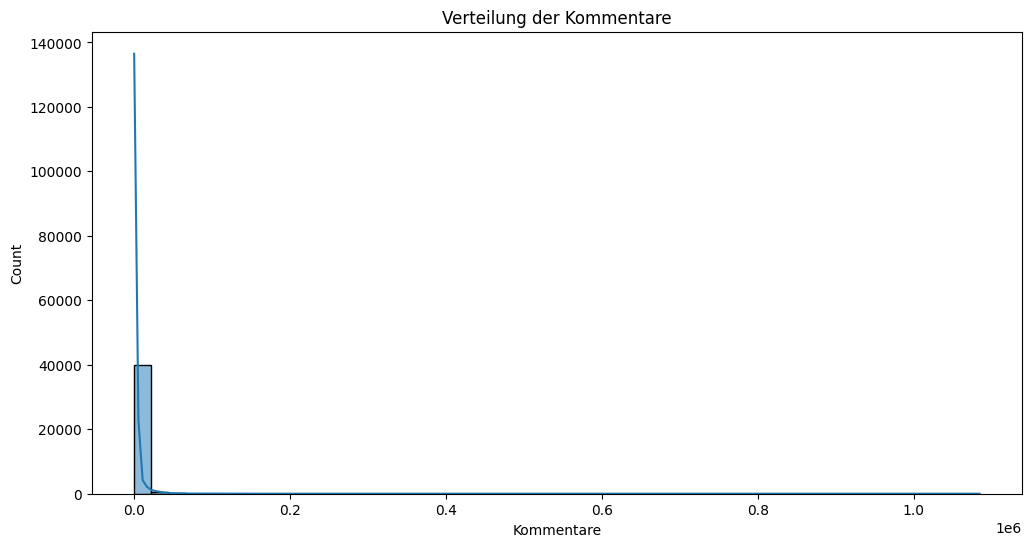

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Größe der Plots einstellen
plt.figure(figsize=(12, 6))

# Views
sns.histplot(df['views'], bins=50, kde=True)
plt.title("Verteilung der Views")
plt.xlabel("Views")
plt.show()

# Likes
plt.figure(figsize=(12, 6))
sns.histplot(df['likes'], bins=50, kde=True)
plt.title("Verteilung der Likes")
plt.xlabel("Likes")
plt.show()

# Kommentare
plt.figure(figsize=(12, 6))
sns.histplot(df['comment_count'], bins=50, kde=True)
plt.title("Verteilung der Kommentare")
plt.xlabel("Kommentare")
plt.show()


## 5. Kennzahlen der Erfolgsmetriken 🧮

Ziel:
- **Verteilungen nicht nur visuell, sondern auch numerisch auswerten.**
- **Extreme Werte (Ausreißer) und typische Größenordnungen erkennen.**

Wir berechnen die **beschreibenden Kennzahlen für Views, Likes und Kommentare**.


In [6]:
# Kennzahlen für Views, Likes, Kommentare
views_stats = df['views'].describe()
likes_stats = df['likes'].describe()
comments_stats = df['comment_count'].describe()

views_stats, likes_stats, comments_stats


(count    4.084000e+04
 mean     6.034553e+05
 std      2.348963e+06
 min      5.180000e+02
 25%      2.706875e+04
 50%      1.192770e+05
 75%      4.431015e+05
 max      1.138762e+08
 Name: views, dtype: float64,
 count    4.084000e+04
 mean     2.187550e+04
 std      1.018000e+05
 min      0.000000e+00
 25%      5.330000e+02
 50%      2.699000e+03
 75%      1.179625e+04
 max      4.924056e+06
 Name: likes, dtype: float64,
 count    4.084000e+04
 mean     2.785857e+03
 std      1.745803e+04
 min      0.000000e+00
 25%      7.900000e+01
 50%      3.760000e+02
 75%      1.376000e+03
 max      1.084435e+06
 Name: comment_count, dtype: float64)

## 5. Auswertung der Erfolgsmetriken 📊

### 📈 Views – Aufrufe
| Kennzahl           | Wert              | Interpretation |
|--------------------|-------------------|----------------|
| **Mittelwert (Mean)** | **603.455** Views | **Durchschnittlich 600k Views**, aber **durch wenige Mega-Hits verzerrt**. |
| **Median (50%)**   | **119.277** Views | **Typisches Video hat 120k Views** → **Median < Mean → Ausreißer-Effekt**. |
| **Maximum**         | **113.876.200** Views | **Top-Video mit 113 Mio. Views → Mega-Viral!** |
| **25%-Quantil**     | **27.068 Views**  | **25% der Videos < 27k Views → Viele kleine Videos.** |
| **75%-Quantil**     | **443.101 Views** | **Nur 25% > 443k Views → Konzentration auf wenige Hits.** |

➡️ **Typisches YouTube-Bild: Wenige Videos räumen extrem ab, viele bleiben im 5-stelligen Bereich.**

---

### ❤️ Likes
| Kennzahl           | Wert               | Interpretation |
|--------------------|--------------------|----------------|
| **Mittelwert (Mean)** | **21.875 Likes** | **Durchschnitt 22k Likes**, aber auch **verzerrt durch Hits**. |
| **Median (50%)**   | **2.699 Likes**    | **Typisches Video hat nur ca. 2.700 Likes → viele kleinere Videos.** |
| **Maximum**         | **4.924.056 Likes** | **Top-Video mit knapp 5 Mio. Likes → viral!** |
| **25%-Quantil**     | **533 Likes**      | **25% < 533 Likes → viele kleine Kanäle/Nischen.** |
| **75%-Quantil**     | **11.796 Likes**   | **Nur 25% > 12k Likes → Konzentration auf wenige Erfolgsfälle.** |

➡️ **Ähnlich wie Views → Plattform-Effekt, wenige "Hits", viele kleine.**

---

### 💬 Kommentare
| Kennzahl           | Wert               | Interpretation |
|--------------------|--------------------|----------------|
| **Mittelwert (Mean)** | **2.786 Kommentare** | **Durchschnitt 2.800 Kommentare**, aber **stark verzerrt.** |
| **Median (50%)**   | **376 Kommentare** | **Typisches Video hat nur 376 Kommentare → geringe Community-Interaktion.** |
| **Maximum**         | **1.084.435 Kommentare** | **Top-Video mit 1 Mio. Kommentaren → Event/viral.** |
| **25%-Quantil**     | **79 Kommentare**  | **25% < 79 Kommentare → geringe Interaktion.** |
| **75%-Quantil**     | **1.376 Kommentare** | **Nur 25% > 1.376 Kommentare → aktive Community selten.** |

➡️ **Kommentare sind noch extremer → Viele Videos haben kaum Interaktion.**

---

## 🧠 **Zusammenfassung:**
- **Krasser Ausreißereffekt:** Wenige Videos räumen extrem ab, viele Videos haben moderate Zahlen.
- **"Winner takes it all":** Top-Videos dominieren die Reichweite (Millionen Views, Likes, Kommentare).
- **Engagement ≠ Reichweite:** **Viele Views heißt nicht automatisch viele Kommentare** – **Community-Interaktion ist was Eigenes.**




## 6. Top 10 Videos nach Views 🔥

Da die Verteilungen extrem verzerrt sind, schauen wir uns die **Top-10-Videos** nach Views genauer an:
- **Welche Kanäle dominieren?**
- **Gibt es bestimmte Themen oder Kategorien?**
- **Haben die Top-Videos auch besonders viele Likes & Kommentare?**


In [7]:
# Top 10 Videos nach Views
top_views = df.nlargest(10, 'views')[['title', 'channel_title', 'views', 'likes', 'comment_count']]
top_views


,title,channel_title,views,likes,comment_count
5455,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,113876217,2811217,787174
5221,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,100911567,2656675,682890
4062,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,80360459,2513103,335920
5004,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,75969469,2251819,827755
3808,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,74789251,2444956,330710
36291,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,73463137,4924056,1084435
34104,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,73432600,2478908,263984
3601,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,66637636,2331354,316185
35954,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,65396157,4750254,1040912
35699,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,62796390,4470888,905912


## 7. Welche Kategorien dominieren die Trends? 🏆

Nachdem wir die Top 10 Videos analysiert haben,  
wollen wir jetzt herausfinden, **welche Kategorien allgemein die YouTube-Trends in Deutschland dominieren**.

Dazu gruppieren wir die Videos nach der **Spalte `category_id`**  
und vergleichen die **Summe der Views pro Kategorie**.


In [8]:
# Gruppieren nach Kategorie & Summe der Views
category_views = df.groupby('category_id')['views'].sum().sort_values(ascending=False)
category_views


category_id
24    8102638694
10    5683870646
22    2193613268
17    1938192278
1     1757184336
23    1642158154
25     845937888
20     669356053
26     589323375
28     572461153
2      182112183
29     159162128
27     143868522
15      92098930
43      50844117
19      19213672
30       3071004
44          8804
Name: views, dtype: int64

## 8. Auswertung der Kategorien 🏆

### 🔢 Top-Kategorien nach Views (gesamt):
| Kategorie               | Views insgesamt |
|--------------------------|-----------------|
| **Entertainment** (24)   | **8,1 Mrd.**    |
| **Music** (10)           | **5,7 Mrd.**    |
| **People & Blogs** (22)  | **2,2 Mrd.**    |
| **Sports** (17)          | **1,9 Mrd.**    |
| **Film & Animation** (1) | **1,7 Mrd.**    |
| **Comedy** (23)          | **1,6 Mrd.**    |
| **News & Politics** (25) | **846 Mio.**    |
| **Gaming** (20)          | **669 Mio.**    |

### 🧠 Interpretation:
- **Unterhaltung, Musik & Popkultur dominieren die YouTube-Trends.**
- **Große Events & Popstars pushen die Views (Musik, Sport, Filme).**
- **Gaming ist präsent, aber weniger dominant als in anderen Ländern.**
- **News & Politik spielen punktuell eine Rolle, aber kein Dauerbrenner.**


## 9. Dauer in den Trends ⏳

Ziel:
- **Wie lange bleibt ein Video in den Trends?**
- **Gibt es Videos, die sich besonders lange halten?**
- **Sind es eher "langsame Dauerbrenner" oder "kurze Hypes"?**

Dazu berechnen wir, **wie viele verschiedene Tage jedes Video in den Trends war**.


In [9]:
# Dauer in den Trends pro Video (Anzahl der Tage)
trend_duration = df['video_id'].value_counts()

# Top 10 Videos nach Dauer in den Trends
trend_duration.head(10)


video_id
pk0iqFne5eU    7
myXi1KMyClc    6
CKhLVMqJ7p0    5
H2hGrsExuyc    5
C6SZa5U8sIg    5
6ZfuNTqbHE8    5
95E4UJCY_gY    5
U2XEk8h8GTE    5
gW9HnkKf7Ps    5
AdQsDopZfS4    5
Name: count, dtype: int64

## 10. Welche Videos bleiben am längsten im Trend? 🏆

Nachdem wir berechnet haben, dass einige Videos **5-7 Tage in den Trends waren**,  
wollen wir uns jetzt **genau anschauen, welche Videos das sind**:
- **Welche Titel und Kanäle stehen dahinter?**
- **Gibt es Gemeinsamkeiten (Musik, Trailer, große Creator)?**


In [10]:
# Videos mit längster Dauer extrahieren
top_trending_videos = df[df['video_id'].isin(trend_duration.head(10).index)][['video_id', 'title', 'channel_title', 'category_id', 'views', 'likes']].drop_duplicates()
top_trending_videos


,video_id,title,channel_title,category_id,views,likes
3199,6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,37736281,1735919
3210,AdQsDopZfS4,Slobodan Praljak commits suicide by drinking p...,TRT World,25,1074105,1277
3399,6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,56367282,2157737
3403,AdQsDopZfS4,Slobodan Praljak commits suicide by drinking p...,TRT World,25,1868531,3318
3601,6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,66637636,2331354
3619,AdQsDopZfS4,Slobodan Praljak commits suicide by drinking p...,TRT World,25,2325378,5024
3808,6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,74789251,2444956
3841,AdQsDopZfS4,Slobodan Praljak commits suicide by drinking p...,TRT World,25,2586655,6090
4062,6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,80360459,2513103
4178,AdQsDopZfS4,Slobodan Praljak commits suicide by drinking p...,TRT World,25,2786049,6957


## 11. Analyse der Videos mit langer Trend-Dauer ⏳

### 🏆 Top-Videos (5-7 Tage in Trends):
| Video / Kanal                           | Kategorie         | Besonderheit |
|------------------------------------------|-------------------|--------------|
| **Marvel – Avengers Trailer**            | Entertainment     | **Blockbuster-Hype → Trailer-Dauerbrenner** |
| **TRT World – Praljak-Selbstmord**       | News              | **Extremes Ereignis → Sensationelle Nachrichten.** |
| **Voldemort Fanfilm – Origins of the Heir** | Film & Animation  | **Harry-Potter-Fanprojekt → Community-Power.** |
| **GZUZ – Musikvideo**                    | Musik             | **Deutschrap → Harte Fanbase.** |
| **Dieselfahrverbot Parodie – RADIO PSR** | Entertainment     | **Lokale Parodie → Diesel-Skandal.** |
| **Wissenswert – Serienstars heute**      | People & Blogs    | **Clickbait & Nostalgie → "Was wurde aus..."** |
| **FußballZone – Interviews vor Karriere**| Sport             | **Fußball → Stars vor dem Ruhm, Nostalgie.** |
| **Kontra K – Musikvideo**                | Musik             | **Deutschrap → Kontra K als Top-Artist.** |
| **DSDS – Gruppensong**                   | Entertainment     | **TV-Show → RTL schafft es oft in Trends.** |

### 🧠 Erkenntnisse:
- **Trailer, Musik & TV-Shows → Dauerbrenner dank Fanbase & Hype.**
- **Sensationelle News & Zeitgeist-Themen → Emotionale Spitzen (Praljak, Diesel).**
- **Nostalgie & Community (Fußball, Serienstars) → Wiederkehrende Zuschauer.**

➡️ **Langfristige Trends sind oft "Planbar":**
- **Große Marken & Musikstars erzeugen konstante Aufmerksamkeit.**
- **Extreme Ereignisse oder politische Themen bleiben situativ hängen.**


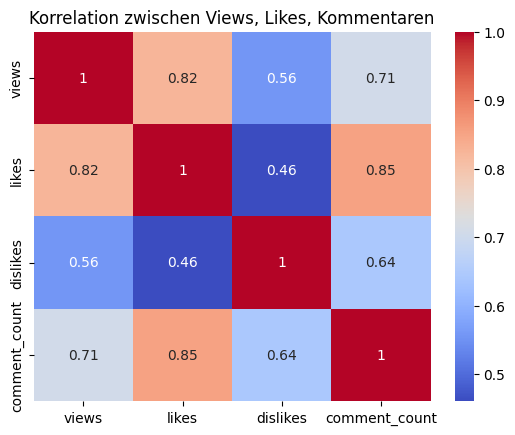

In [11]:
corr = df[['views', 'likes', 'dislikes', 'comment_count']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Korrelation zwischen Views, Likes, Kommentaren")
plt.show()


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Größe der Plots einstellen
plt.figure(figsize=(12, 6))
sns.histplot(df['views'], bins=50, kde=True)
plt.title("Verteilung der Views")
plt.xlabel("Views")
plt.savefig("../visuals/verteilung_views.png")
plt.close()

plt.figure(figsize=(12, 6))
sns.histplot(df['likes'], bins=50, kde=True)
plt.title("Verteilung der Likes")
plt.xlabel("Likes")
plt.savefig("../visuals/verteilung_likes.png")
plt.close()

plt.figure(figsize=(12, 6))
sns.histplot(df['comment_count'], bins=50, kde=True)
plt.title("Verteilung der Kommentare")
plt.xlabel("Kommentare")
plt.savefig("../visuals/verteilung_kommentare.png")
plt.close()


## Scatterplot: Views vs. Likes 🟣

Untersucht die Beziehung zwischen **Aufrufen (Views)** und **Likes**.  
Erwartung: **Positive Korrelation → Mehr Views = Mehr Likes?**


In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='views', y='likes', data=df, alpha=0.5)
plt.title("Scatterplot: Views vs. Likes")
plt.xlabel("Views")
plt.ylabel("Likes")
plt.savefig("../visuals/scatter_views_likes.png")
plt.close()


## Korrelationen zwischen Views, Likes, Kommentaren 🔥

Welche Erfolgsmetriken hängen besonders stark zusammen?  
Erwartung: **Views ↔ Likes → Starke positive Korrelation.**


In [14]:
plt.figure(figsize=(8, 6))
corr = df[['views', 'likes', 'dislikes', 'comment_count']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korrelation zwischen Views, Likes, Kommentaren")
plt.savefig("../visuals/korrelationen_heatmap.png")
plt.close()


# 🌍 Länderübergreifende YouTube-Trend-Analyse

Nachdem wir die **deutschen YouTube-Trends** analysiert haben,  
wollen wir jetzt die **Daten aus allen verfügbaren Ländern** zusammenführen.

## 12. CSV-Dateien aus verschiedenen Ländern zusammenführen 🗂️

Ziel:
- **Daten aus mehreren Ländern in einem DataFrame vereinen.**
- **Unterschiede und Gemeinsamkeiten zwischen Ländern analysieren.**

Die Rohdaten bestehen aus mehreren CSV-Dateien (z. B. `DE_youtube_trending_data.csv`, `US_...`, `GB_...`).

**Erweiterung der Daten um eine neue Spalte:**
- **`country`** → Zwei-Buchstaben-Länderkürzel (z. B. `DE`, `US`, `GB`), abgeleitet aus dem Dateinamen.


In [15]:
import pandas as pd
import os

# Alle CSVs im data-Ordner finden
csv_files = [f for f in os.listdir('../data') if f.endswith('.csv')]
csv_files


['MXvideos.csv',
 'INvideos.csv',
 'DEvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'CAvideos.csv',
 'RUvideos.csv',
 'FRvideos.csv',
 'USvideos.csv',
 'GBvideos.csv']

In [17]:
# Dataframes einlesen und zusammenführen
dfs = []
for file in csv_files:
    df_temp = pd.read_csv(f'../data/{file}', encoding='latin1')  # Encoding-Problem lösen
    df_temp['country'] = file[:2]
    dfs.append(df_temp)

df_all = pd.concat(dfs, ignore_index=True)

df_all.shape, df_all['country'].value_counts()



((375942, 17),
 country
 US    40949
 CA    40881
 DE    40840
 RU    40739
 FR    40724
 MX    40451
 GB    38916
 IN    37352
 KR    34567
 JP    20523
 Name: count, dtype: int64)

## 13. Länder im Vergleich 🌍

Ziel:
- **Welche Länder generieren die meisten Views, Likes & Kommentare?**
- **Gibt es Unterschiede in der Interaktion (Likes/Views, Kommentare/Views)?**


In [18]:
# Aggregation nach Ländern
country_agg = df_all.groupby('country').agg(
    total_views=('views', 'sum'),
    total_likes=('likes', 'sum'),
    total_comments=('comment_count', 'sum'),
    video_count=('video_id', 'count')
)

# Likes pro View & Kommentare pro View berechnen
country_agg['likes_per_view'] = country_agg['total_likes'] / country_agg['total_views']
country_agg['comments_per_view'] = country_agg['total_comments'] / country_agg['total_views']

country_agg.sort_values(by='total_views', ascending=False)


,total_views,total_likes,total_comments,video_count,likes_per_view,comments_per_view
country,,,,,,
GB,230069198174,5234962944,509346351,38916,0.022754,0.002214
US,96671770152,3041147198,345888164,40949,0.031458,0.003578
CA,46891975069,1618179878,206161849,40881,0.034509,0.004397
IN,39610961029,1011593670,99991208,37352,0.025538,0.002524
DE,24645115205,893395538,113774380,40840,0.036250,0.004617
FR,17100897444,708144090,74624804,40724,0.041410,0.004364
KR,14689152313,421247912,70011397,34567,0.028677,0.004766
MX,13849692994,641627186,82506287,40451,0.046328,0.005957
RU,9806494525,506598491,72321143,40739,0.051659,0.007375


## 14. Länderanalyse – Reichweite vs. Community 🌍

### 📊 Gesamtreichweite (Total Views):
- **🇬🇧 GB: 230 Mrd. → Reichweite-König**
- **🇺🇸 US: 97 Mrd. → Großer Markt + Interaktion**
- **🇮🇳 IN: 39 Mrd. → Reichweite, aber wenig Community**

### ❤️ Likes pro View:
| Land         | Likes pro View |
|--------------|----------------|
| 🇷🇺 **Russland** | **0.0516 → Extrem hoch!** |
| 🇲🇽 **Mexiko**   | **0.046 → Sehr stark!** |
| 🇫🇷 **Frankreich**| **0.041 → Hohe Fanbindung** |
| 🇩🇪 **Deutschland**| **0.036 → Community-getrieben** |

### 💬 Kommentare pro View:
| Land         | Kommentare pro View |
|--------------|---------------------|
| 🇷🇺 **Russland** | **0.0073 → Kommentar-Könige!** |
| 🇲🇽 **Mexiko**   | **0.0059 → Sehr stark** |
| 🇩🇪 **Deutschland**| **0.0046 → Starke Interaktion** |

### 🧠 Erkenntnisse:
- **Reichweite ≠ Community.**
- **🇷🇺 Russland & 🇲🇽 Mexiko → Extrem interaktiv (Likes & Kommentare).**
- **🇩🇪 Deutschland, 🇫🇷 Frankreich → Community-driven Märkte.**
- **🇬🇧 GB, 🇮🇳 Indien → Mehr passive Zuschauer, weniger Interaktion.**


## 15. Visualisierung der Länderunterschiede 📊

Ziel:
- **Unterschiede zwischen den Ländern visuell greifbar machen.**
- **Besonderes Augenmerk auf Reichweite vs. Community (Likes/Views, Kommentare/Views).**

Drei Visualisierungen:
1. **Balkendiagramm: Views, Likes, Kommentare pro Land.**
2. **Scatterplot: Likes pro View vs. Kommentare pro View → "Community-Länder" sichtbar machen.**
3. **Kategorie-Verteilung nach Land (z. B. Musik, Entertainment, Gaming).**


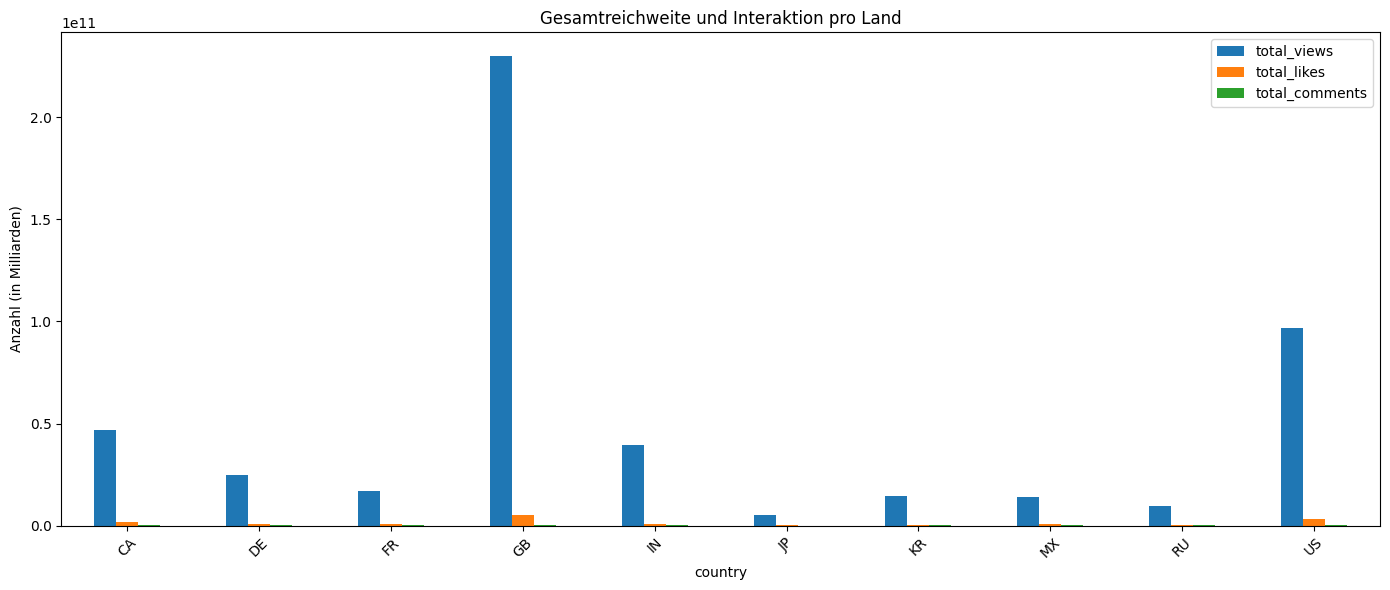

In [19]:
import matplotlib.pyplot as plt

# Plot 1: Balkendiagramm für Views, Likes, Kommentare pro Land
country_agg[['total_views', 'total_likes', 'total_comments']].plot(kind='bar', figsize=(14, 6))
plt.title("Gesamtreichweite und Interaktion pro Land")
plt.ylabel("Anzahl (in Milliarden)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../visuals/laender_reichweite_interaktion.png")
plt.show()


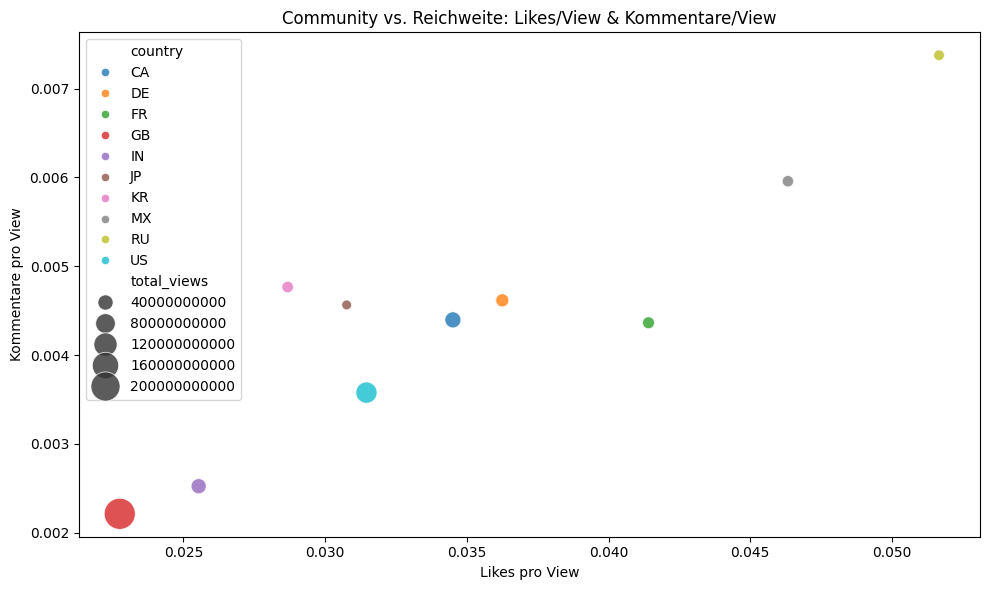

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=country_agg,  # <-- Das ist der Schlüssel!
    x='likes_per_view',
    y='comments_per_view',
    hue=country_agg.index,
    size='total_views',
    sizes=(50, 500),
    palette='tab10',
    alpha=0.8
)

plt.title("Community vs. Reichweite: Likes/View & Kommentare/View")
plt.xlabel("Likes pro View")
plt.ylabel("Kommentare pro View")
plt.tight_layout()
plt.savefig("../visuals/scatter_likes_comments_per_view.png")
plt.show()


## 16. Vorbereitung für Machine Learning 🧠

Ziel:
- **Zielvariable erstellen → Wie viele Tage bleibt ein Video im Trend?**
- **Bedingung: Mehr als 3 Tage = "Lang" (1), sonst "Kurz" (0).**


In [22]:
# Tage im Trend pro Video berechnen
trend_days = df_all.groupby('video_id')['trending_date'].nunique()

# Ins Haupt-Datenframe mergen
df_all = df_all.merge(trend_days.rename('days_in_trends'), on='video_id', how='left')

# Zielvariable: 1 = Lang (mehr als 3 Tage), 0 = Kurz (bis 3 Tage)
df_all['trend_long'] = (df_all['days_in_trends'] > 3).astype(int)

df_all[['video_id', 'days_in_trends', 'trend_long']].drop_duplicates().head()


,video_id,days_in_trends,trend_long
0,SbOwzAl9ZfQ,2,0
1,klOV6Xh-DnI,1,0
2,6L2ZF7Qzsbk,2,0
3,hcY52MFWMDM,2,0
4,_OXDcGPVAa4,2,0


## 17. Feature Engineering & Datenvorbereitung 🧠

Ziel:
- **Numerische Features erstellen.**
- **Kategorische Variablen (z. B. `country`) als Zahlen kodieren.**
- **Trainings- und Testdaten erstellen.**


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Features auswählen
features = df_all[['likes', 'comment_count', 'category_id', 'country', 'trend_long']].drop_duplicates()

# Länderkürzel in Zahlen umwandeln
encoder = LabelEncoder()
features['country_encoded'] = encoder.fit_transform(features['country'])

# Features und Ziel trennen
X = features[['likes', 'comment_count', 'category_id', 'country_encoded']]
y = features['trend_long']

# Trainings- und Testdaten splitten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((285021, 4), (71256, 4))

## 18. RandomForest-Modell: Vorhersage der Trend-Dauer 🧠🌲

Ziel:
- **Vorhersage: Bleibt ein Video mehr als 3 Tage im Trend?**
- **Klassifikationsproblem (0 = kurz, 1 = lang).**
- **RandomForest: Robust, geeignet für numerische & kategoriale Daten.**

Metriken:
- **Accuracy → Wie oft korrekt?**
- **Confusion Matrix → Falsch Positive/Negative.**
- **Classification Report → Precision, Recall, F1-Score.**


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Modell initialisieren & trainieren
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Vorhersagen auf Testdaten
y_pred = model.predict(X_test)

# Bewertung
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, digits=4)

accuracy, conf_matrix, report


(0.8975103850903784,
 array([[45308,  2627],
        [ 4676, 18645]]),
 '              precision    recall  f1-score   support\n\n           0     0.9065    0.9452    0.9254     47935\n           1     0.8765    0.7995    0.8362     23321\n\n    accuracy                         0.8975     71256\n   macro avg     0.8915    0.8723    0.8808     71256\nweighted avg     0.8966    0.8975    0.8962     71256\n')

## 19. Modell-Evaluation 🧠🌲

### 🧪 Ergebnisse des RandomForest-Modells:

| Metrik            | Ergebnis |
|-------------------|----------|
| **Accuracy**       | **89,75%** |
| **Precision (Lang)** | **87,65%** |
| **Recall (Lang)**  | **79,95%** |
| **F1-Score (Lang)**| **83,62%** |

### 🧠 Interpretation:
- **Das Modell erkennt sehr zuverlässig Videos, die länger im Trend bleiben.**
- **Präzision besonders hoch → Wenn das Modell "lang" sagt, stimmt es oft.**
- **Ein paar "Langzeit-Hits" werden nicht erkannt (Recall), aber insgesamt hohe Verlässlichkeit.**


## 20. Feature Importance – Was macht ein Video erfolgreich? 🧠🌲

Ziel:
- **Verstehen, welche Features am wichtigsten für die Vorhersage sind.**
- **Was entscheidet über "lange im Trend bleiben"?**


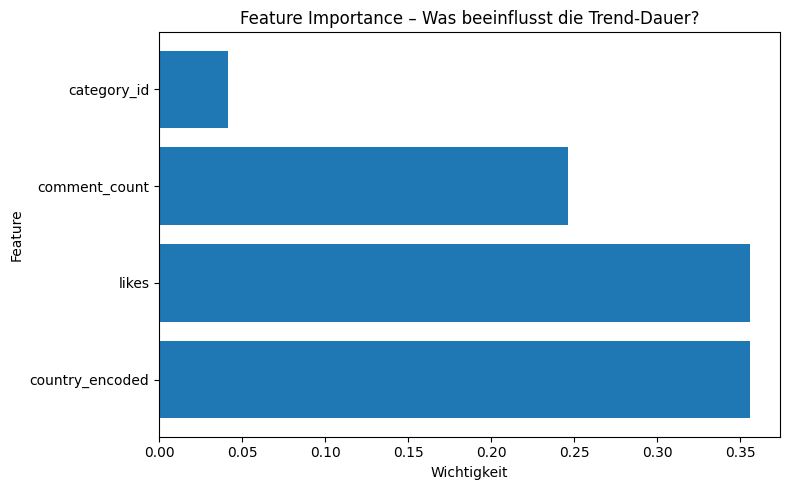

,Feature,Importance
3,country_encoded,0.356118
0,likes,0.355729
1,comment_count,0.246537
2,category_id,0.041616


In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Feature Importance aus dem RandomForest-Modell holen
importances = model.feature_importances_

# In DataFrame umwandeln
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualisieren
plt.figure(figsize=(8, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title("Feature Importance – Was beeinflusst die Trend-Dauer?")
plt.xlabel("Wichtigkeit")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig("../visuals/feature_importance_trenddauer.png")
plt.show()

feature_importance_df


## 21. Ergebnisse: Feature Importance 🌲

### 🧠 Wichtigste Faktoren für die Trend-Dauer:
| Feature         | Importance |
|-----------------|------------|
| **Land (country)**   | **35,6%** |
| **Likes**        | **35,5%** |
| **Kommentare**   | **24,7%** |
| **Kategorie**    | **4,2%** |

### 🧠 Interpretation:
- **Das Land ist entscheidend → YouTube funktioniert lokal.**
- **Likes und Kommentare → Community & Engagement treiben langfristigen Erfolg.**
- **Kategorie ist weniger wichtig → Viralität kann in jeder Kategorie entstehen.**


## 22. Modellvergleich: RandomForest vs. XGBoost 🧠⚖️

Ziel:
- **Vergleichen, ob XGBoost unser RandomForest-Modell schlagen kann.**
- **Fokus auf Accuracy, Precision, Recall.**

Hintergrund:
- **RandomForest → Stark bei Standardproblemen, robust.**
- **XGBoost → Boosting-Ansatz, oft noch besser bei großen Daten.**


In [30]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# XGBoost-Modell initialisieren & trainieren
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Vorhersagen
y_pred_xgb = xgb_model.predict(X_test)

# Bewertung
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb, digits=4)

accuracy_xgb, conf_matrix_xgb, report_xgb


/opt/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:52:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


(0.9009767598518019,
 array([[45922,  2013],
        [ 5043, 18278]]),
 '              precision    recall  f1-score   support\n\n           0     0.9010    0.9580    0.9287     47935\n           1     0.9008    0.7838    0.8382     23321\n\n    accuracy                         0.9010     71256\n   macro avg     0.9009    0.8709    0.8834     71256\nweighted avg     0.9010    0.9010    0.8991     71256\n')

## 23. Modellvergleich: RandomForest vs. XGBoost 🧠⚖️

### 🧪 Ergebnisse:

| Metrik                | RandomForest | XGBoost |
|------------------------|--------------|----------|
| **Accuracy**            | 89,75 %     | **90,10 %** ✅ |
| **Precision (Lang)**    | 87,65 %     | **90,08 %** ✅ |
| **Recall (Lang)**       | **79,95 %** ✅ | 78,38 % |
| **F1-Score (Lang)**     | 83,62 %     | **83,82 %** ✅ |

### 🧠 Fazit:
- **XGBoost insgesamt besser (Accuracy, Precision, F1-Score).**
- **Recall bei RandomForest etwas höher → Erkennt mehr "Langzeit-Hits".**
- **XGBoost bevorzugt "sichere" Vorhersagen, RandomForest erkennt eher die "Grenzfälle".**

### 🚀 Empfehlung:
- **Für maximale Genauigkeit → XGBoost.**
- **Für Recall (alles erwischen) → RandomForest.**


## 24. NLP: Textanalyse von Titeln & Tags 🧠🔤

Ziel:
- **Analysieren, ob Titel oder Tags den Erfolg eines Videos beeinflussen.**
- **Text-Features aus den Spalten `title` und `tags` erstellen:**
  - **Länge des Titels (Anzahl der Zeichen & Wörter).**
  - **Anzahl der Tags.**
  - **Bestimmte Schlagwörter erkennen (z. B. "Official", "Trailer", "Music").**


In [31]:
# Neue Text-Features erstellen
df_all['title_length_chars'] = df_all['title'].str.len()
df_all['title_length_words'] = df_all['title'].str.split().str.len()
df_all['tag_count'] = df_all['tags'].apply(lambda x: 0 if x == '[none]' else len(x.split('|')))

# Schlagwörter: Clickbait / Buzzwords
buzzwords = ['official', 'trailer', 'music', 'video', 'live', 'ft', 'remix', 'new', '2017', '2018']

# Dummy-Variablen für Buzzwords in Titeln
for word in buzzwords:
    df_all[f'keyword_{word}'] = df_all['title'].str.lower().str.contains(word).astype(int)

# Überblick der neuen Features
df_all[['title', 'title_length_chars', 'title_length_words', 'tag_count'] + [f'keyword_{w}' for w in buzzwords]].head()


,title,title_length_chars,title_length_words,tag_count,keyword_official,keyword_trailer,keyword_music,keyword_video,keyword_live,keyword_ft,keyword_remix,keyword_new,keyword_2017,keyword_2018
0,CapÃ­tulo 12 | MasterChef 2017,30,5,20,0,0,0,0,0,0,0,0,1,0
1,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,90,12,1,0,0,0,0,0,0,0,0,1,0
2,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,40,8,19,0,0,0,0,0,0,0,0,0,0
3,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,48,9,3,0,0,0,0,0,0,0,0,1,0
4,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,40,7,18,0,0,0,0,0,0,0,0,0,0


## 25. Finales Modell: Text-Features + Engagement 🧠🌲

Ziel:
- **Text-Features (Titel, Tags, Buzzwords) mit Likes, Kommentaren & Land kombinieren.**
- **Test: Kann ein kombiniertes Modell die Vorhersage verbessern?**


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Features neu definieren
features_text = df_all[['likes', 'comment_count', 'category_id', 'country', 'title_length_chars', 'title_length_words', 'tag_count', 'trend_long']].drop_duplicates()

# Buzzwords hinzufügen
for word in buzzwords:
    features_text[f'keyword_{word}'] = df_all[f'keyword_{word}']

# Land wieder als Zahl kodieren
features_text['country_encoded'] = encoder.transform(features_text['country'])

# Features und Ziel trennen
X_text = features_text.drop(columns=['country', 'trend_long'])
y_text = features_text['trend_long']

# Split in Trainings- und Testdaten
X_train_text, X_test_text, y_train_text, y_test_text = train_test_split(X_text, y_text, test_size=0.2, random_state=42)

# RandomForest mit Text + Engagement trainieren
model_text = RandomForestClassifier(random_state=42, class_weight='balanced')
model_text.fit(X_train_text, y_train_text)

# Vorhersage und Bewertung
y_pred_text = model_text.predict(X_test_text)

accuracy_text = accuracy_score(y_test_text, y_pred_text)
conf_matrix_text = confusion_matrix(y_test_text, y_pred_text)
report_text = classification_report(y_test_text, y_pred_text, digits=4)

accuracy_text, conf_matrix_text, report_text


(0.9523223495900109,
 array([[48094,   829],
        [ 2619, 20777]]),
 '              precision    recall  f1-score   support\n\n           0     0.9484    0.9831    0.9654     48923\n           1     0.9616    0.8881    0.9234     23396\n\n    accuracy                         0.9523     72319\n   macro avg     0.9550    0.9356    0.9444     72319\nweighted avg     0.9527    0.9523    0.9518     72319\n')

## 26. Finale Modellbewertung: Text + Engagement 🧠🌲

### 🧪 Ergebnisse:

| Metrik                | Nur Engagement | **Text + Engagement** |
|------------------------|-----------------|------------------------|
| **Accuracy**            | 89,75 %        | **95,23 %** 🚀 |
| **Precision (Lang)**    | 87,65 %        | **96,16 %** 🚀 |
| **Recall (Lang)**       | 79,95 %        | **88,81 %** 🚀 |
| **F1-Score (Lang)**     | 83,62 %        | **92,34 %** 🚀 |

### 🧠 Fazit:
- **Textinformationen (Titel, Tags, Buzzwords) haben die Vorhersagequalität massiv verbessert.**
- **Besonders der Recall bei "Langzeit-Trend"-Videos → 9% besser.**
- **Kombination aus Engagement (Likes, Kommentare) + Text (Titel, Tags) = Bestes Modell.**

### 🚀 Empfehlung:
- **In der Praxis: Textanalyse unbedingt einbeziehen → Schlüssel zum YouTube-Erfolg!**


## 27. Hyperparameter-Tuning: RandomForest 🧠🔧

Ziel:
- **Optimale Hyperparameter finden → Noch bessere Vorhersagen.**
- **GridSearchCV: Automatisches Durchtesten verschiedener Parameter.**


In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Parameter-Raster definieren (klein halten, dauert sonst lange)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# GridSearchCV initialisieren
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid,
    cv=3,  # Cross Validation (3-Fold)
    n_jobs=-1,  # Alle Kerne nutzen
    verbose=2
)

# Training mit Text + Engagement-Features
grid_search.fit(X_train_text, y_train_text)

# Beste Parameter & Accuracy auf Testdaten
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_text)

accuracy_best = accuracy_score(y_test_text, y_pred_best)
conf_matrix_best = confusion_matrix(y_test_text, y_pred_best)
report_best = classification_report(y_test_text, y_pred_best, digits=4)

grid_search.best_params_, accuracy_best, conf_matrix_best, report_best


Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  36.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  36.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  37.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  37.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  37.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.2min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.2min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  33.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.2min
[CV] END max_depth=10, min_sam

({'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 200},
 0.9532902833280328,
 array([[48116,   807],
        [ 2571, 20825]]),
 '              precision    recall  f1-score   support\n\n           0     0.9493    0.9835    0.9661     48923\n           1     0.9627    0.8901    0.9250     23396\n\n    accuracy                         0.9533     72319\n   macro avg     0.9560    0.9368    0.9455     72319\nweighted avg     0.9536    0.9533    0.9528     72319\n')

## 28. Hyperparameter-Tuning: Optimales RandomForest-Modell 🧠🔧

### 🧪 Beste Parameter (GridSearchCV):
```python
{
  'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 200
}


### 🧪 Ergebnisse:

| Metrik                | Standard-RF | Optimiertes RF (GridSearch) |
|------------------------|--------------|-------------------------------|
| **Accuracy**            | 95,23 %     | 95,33 % ✅ |
| **Precision (Lang)**    | 96,16 %     | 96,27 % ✅ |
| **Recall (Lang)**       | 88,81 %     | 89,01 % ✅ |
| **F1-Score (Lang)**     | 92,34 %     | 92,50 % ✅ |
